# weight-height

In [6]:
from __future__ import print_function
import os 
#data_path = ['..', '..', 'data']
data_path = ['D:','ML','weigth prediction']


In [7]:
import pandas as pd
import numpy as np

filepath=os.sep.join(data_path+['NCB height and weigth dataset.csv'])
data=pd.read_csv(filepath)
#there are 3 coloum so to make it 2 use 'drop',,,,here "Gender" is dropped.

data.drop(['BMI'], axis=1, inplace=True)
df=pd.DataFrame(data)
df


,Age,Waist Size,Gender,Veg/Non-Veg,Height,Weight
0,20,93,MALE,VEG,177,77
1,19,120,MALE,NON-VEG,156,100
2,20,84,MALE,NON-VEG,171,63
3,21,91,MALE,NON-VEG,177,70
4,20,77,MALE,NON-VEG,165,56
...,...,...,...,...,...,...
221,18,95,MALE,NON-VEG,165,80
222,19,73,FEMALE,VEG,157,53
223,20,83,MALE,VEG,170,62
224,20,72,MALE,NON-VEG,158,50


In [8]:
df['Gender']=df['Gender'].replace(['MALE','FEMALE'],[0,1])
df['Veg/Non-Veg']=df['Veg/Non-Veg'].replace(['VEG','NON-VEG'],[1,0])
one_hot_encoded_data = pd.get_dummies(data, columns = ['Gender','Veg/Non-Veg'])

print(type(one_hot_encoded_data))

#df
one_hot_encoded_data
# print(df.min())
# print(df.max())
# rslt_df = df[df['Height'] >59]
# rslt_df1=df[df['Height'] <60]
# print(rslt_df,rslt_df1)
    

<class 'pandas.core.frame.DataFrame'>


,Age,Waist Size,Height,Weight,Gender_0,Gender_1,Veg/Non-Veg_0,Veg/Non-Veg_1
0,20,93,177,77,1,0,0,1
1,19,120,156,100,1,0,1,0
2,20,84,171,63,1,0,1,0
3,21,91,177,70,1,0,1,0
4,20,77,165,56,1,0,1,0
...,...,...,...,...,...,...,...,...
221,18,95,165,80,1,0,1,0
222,19,73,157,53,0,1,0,1
223,20,83,170,62,1,0,0,1
224,20,72,158,50,1,0,1,0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# get the locations 
#refer:
#https://www.activestate.com/resources/quick-reads/how-to-access-a-column-in-a-dataframe-using-pandas/#:~:text=You%20can%20use%20the%20loc,Let's%20see%20how.&text=If%20we%20wanted%20to%20access,in%20order%20to%20retrieve%20it.
# X = one_hot_encoded_data.drop(['Weight(kg)'], axis=1, inplace=True)
# # X= df(['Age','waistsize',Height(cm)	Weight(kg)	Gender_0	Gender_1'])
# #X=df(['Height'])
# Y = df.iloc[:, -1]#get array of dataset in column 1st
#y=df(['Weight'])
# print(X)



In [10]:
# X = one_hot_encoded_data(['Age','waistsize','Height(cm)','Gender_0','Gender_1'])
# X=one_hot_encoded_data[one_hot_encoded_data.columns[0:4]]
# X
X = one_hot_encoded_data[['Age','Waist Size','Height','Gender_0','Gender_1','Veg/Non-Veg_0','Veg/Non-Veg_1']]
X
#Y=df(['Weight(kg)'])
Y = df.iloc[:, -1]
print(Y)
print(X)

0       77
1      100
2       63
3       70
4       56
      ... 
221     80
222     53
223     62
224     50
225     64
Name: Weight, Length: 226, dtype: int64
     Age  Waist Size  Height  Gender_0  Gender_1  Veg/Non-Veg_0  Veg/Non-Veg_1
0     20          93     177         1         0              0              1
1     19         120     156         1         0              1              0
2     20          84     171         1         0              1              0
3     21          91     177         1         0              1              0
4     20          77     165         1         0              1              0
..   ...         ...     ...       ...       ...            ...            ...
221   18          95     165         1         0              1              0
222   19          73     157         0         1              0              1
223   20          83     170         1         0              0              1
224   20          72     158         1         0 

In [11]:
#convert x to numpy becuase to plot graph data sholud be in array

x=X.to_numpy()
#tup=tuple(x)
#hash1={tup:'Value'}
# #print(x)
y=Y.to_numpy()
#tup1=tuple(y)
#hash2={tup1:'Value'}
#print(hash1.shape)
print(x.shape)
print(Y.shape)
print(type(y))
#print(type(one_hot_encoded_data))
print(type(x))

(226, 7)
(226,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
#print(x_train)
#print(x_test)



In [13]:
x_train
print(x_train.shape)
print(x_test.shape)
#y_train
#y_test
#x_train
#print(x_test)

(158, 7)
(68, 7)


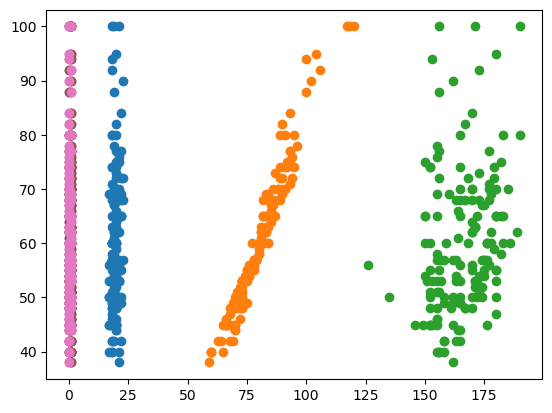

In [14]:
#graph to view training data  of x and y
plt.plot(x_train,y_train,ls='',marker='o')
plt.show()


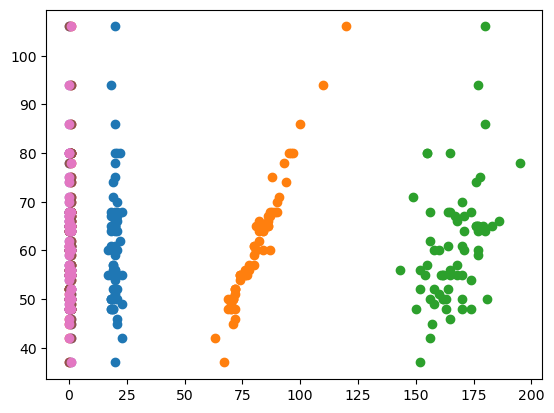

In [15]:
#graph to view x_test data and y_test(actual)data
plt.plot(x_test,y_test,ls='',marker='o')
plt.show()

In [16]:
LR= LinearRegression()
LR.fit(x_train, y_train)
acu=LR.score(x_train,y_train)
#coefficient
LR.coef_
print("coefficient")
print(LR.coef_)
LR.intercept_
#intercept
print("intercept")
print(LR.intercept_)
print("training acuracy",acu)


coefficient
[ 0.15780925  1.18872525  0.02678704 -0.4249052   0.4249052   0.08212139
 -0.08212139]
intercept
-42.4769089131324
training acuracy 0.9514768997295793


In [17]:
#y prediction
y_pred_test=LR.predict(x_test)
print(y_pred_test)
test_acu = LR.score(x_test,y_test)
print("test acuracy",test_acu)

[ 57.65644956  72.34394906  53.03120666  79.95264127  59.67268986
  51.06044641  71.5028477   63.42637486  50.08310448  62.30635885
  47.41041887  44.73828109 107.64094585  75.94716971  66.17301793
  50.84262955  46.86166953  78.60610677  64.94952327  61.06697249
  66.95933003  49.58443854  40.72819879  52.16471226  69.83760291
  51.16116102  78.0008704   57.18866893  57.39947454  95.52195655
  70.46962633  49.47222098  48.44773852  69.71240664  66.72468024
  61.04249083  60.17581762  65.61337325  52.4774178   55.07559812
  72.03337009  60.67739654  46.5902786   49.9491693   47.24969665
  50.15645434  50.52409808  55.19572499  48.2567087   54.70349258
  68.71255477  84.03068368  66.11592329  63.08746     52.96310502
  67.30816911  59.42869356  54.46589993  64.84683694  68.49398138
  67.22489503  76.6333748   68.14866288  48.2530392   56.28819744
  51.35219084  62.79435145  61.01570379]
test acuracy 0.9574322735816745


In [18]:
y_pred_train=LR.predict(x_train)
print(y_pred_train)


[ 61.33484286  48.09753532  61.70770493  48.79014406  61.99656628
  42.31660302  65.62563272  50.74637675  54.99171645  62.52939405
  70.92791892  58.48044405  50.76870197  47.75631509  70.15904736
  86.39939527  72.9303509   61.23352065  52.77052636  90.49566462
  63.7384728   62.36421001  40.12666179  43.79415974  53.59512844
  51.53620942  45.00618134  58.55555693  47.886152    56.08321776
  66.19980497  63.50030244  64.50503899  58.9335183   52.38601981
  63.46829706  60.22939169  48.86992745  77.36963339  49.52291197
  50.40105824  83.84162558  56.28819744  64.76999639  69.89991589
  49.15584595  83.06574276  46.09416209  62.63362923  54.41232586
  60.69425935  49.34180636  56.25112265  35.81840151  63.26565264
  75.76318102  42.39056048  50.41558581  73.4096046   57.74324421
  65.77121238  58.91022195  53.35401523  75.46500305  51.82640501
  54.31255249  68.38974621  65.77412535  70.92791892  77.87121231
  63.39024132  56.69000299  59.27088431  48.02069478  55.38966778
  60.10128

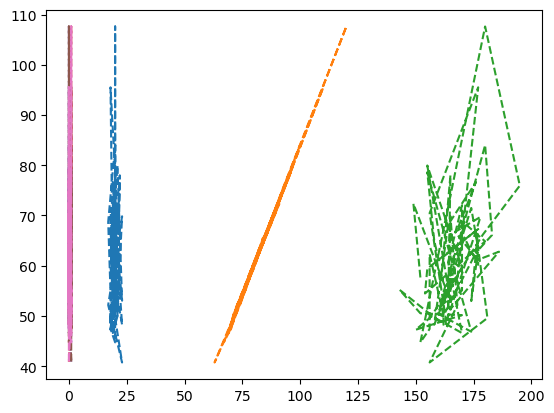

In [19]:
#to view bestfilne 
plt.plot(x_test,y_pred_test,ls='--',marker='')
plt.show()


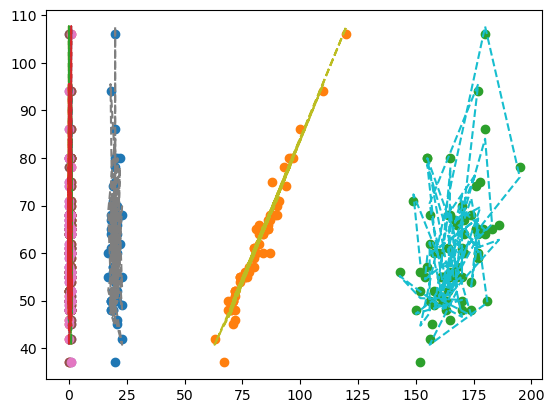

In [20]:
#to view test data and bestfiline
#graph to view x_test data and y_test(actual)data
plt.plot(x_test,y_test,ls='',marker='o')
#graph to view x_text and y_pred(predicted)data
plt.plot(x_test,y_pred_test,ls='--',marker='')
plt.show()


In [21]:
#importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_pred_test)
score1=r2_score(y_train,y_pred_train)
print('r2 socre is',score)
print("training",score1)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_test ))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_test)))


r2 socre is 0.9574322735816745
training 0.9514768997295793
mean_sqrd_error is== 6.147206845002101
root_mean_squared error of is== 2.4793561351693914


In [22]:
y_pred1=LR.predict([[15,86,191,1,0,1,0]])
print(y_pred1)



[66.89414136]


C:\Users\public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
